<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reaction-plane/Participant-eccentricity-v.s-N_part" data-toc-modified-id="Reaction-plane/Participant-eccentricity-v.s-N_part-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reaction-plane/Participant eccentricity v.s N_part</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import pickle
import ROOT
import tdrstyle as tdr
import os
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from array import array as ary
import math
import pickle
from skhep.visual import MplPlotter as skh_plt

from GlauberMC_classes import *
from GlauberMC_Utilities import *

ROOT.gStyle.SetOptStat(0)

tdr.setTDRStyle()

Welcome to JupyROOT 6.14/04


In [2]:
dic_Z={'Si_28':28.,
       'S_32':32.,
       'Ca_40':40.,
       'Ni_58':58.,
       'Cu_62':62.,
       'Au_197':197.,
       'Pb_207':207.}

dic_a={'Si_28':0.580,
       'S_32':2.191,
       'Ca_40':0.586,
       'Ni_58':0.517,
       'Cu_62':0.596,
       'Au_197':0.535,
       'Pb_207':0.546}

dic_w={'Si_28':-0.233,
       'S_32':0.16,
       'Ca_40':-0.161,
       'Ni_58':-0.1308,
       'Cu_62':0.,
       'Au_197':0.,
       'Pb_207':0.}

In [4]:
MakePlots = False
Verbose = False

## Reaction-plane/Participant eccentricity v.s N_part

In [10]:
list_data = [
    'Cu_62-IPRandomfm-XSNN42.0mb-Nevt10000',  # RHIC Cu+Cu
    'Au_197-IPRandomfm-XSNN42.0mb-Nevt10000',  # RHIC Au+Au
    'Pb_207-IPRandomfm-XSNN72.0mb-Nevt10000'] # LHC Pb+Pb

label_data = [
    'RHIC Cu+Cu',
    'RHIC Au+Au',
    'LHC Pb+Pb']

list_epsRP = []
list_epspart = []
list_Npart = []
list_Ncoll = []
list_b = []

for idata in range(len(list_data)):
    print(list_data[idata])
    infile = open('./collision-data/{0}/Events.pkl'.format(list_data[idata]),
                  'rb')
    list_ev = pickle.load(infile)
    Nevt = int(''.join(filter(str.isdigit, list_data[idata].split('-', 3)[3])))
    tmplist_epsRP = []
    tmplist_epspart = []
    tmplist_Npart = []
    tmplist_Ncoll = []
    tmplist_b = []
    for iev in range(Nevt):
        if list_ev[iev].Npart == float('nan'):
            continue
        
        NucA = list_ev[iev].NucA
        NucB = list_ev[iev].NucB
        tmplist_Npart.append(list_ev[iev].Npart)
        tmplist_Ncoll.append(list_ev[iev].Ncoll)
        tmplist_epsRP.append(list_ev[iev].eps_RP)
        tmplist_epspart.append(list_ev[iev].eps_part)
        tmplist_b.append(list_ev[iev].b)
        if Verbose:
            if (iev%100) == 0:
                print ((Count_participant(NucA) + Count_participant(NucB), Count_Ncollisions(NucA, NucB)))

    list_Npart.append(tmplist_Npart)
    list_Ncoll.append(tmplist_Ncoll)
    list_epsRP.append(tmplist_epsRP)
    list_epspart.append(tmplist_epspart)
    list_b.append(tmplist_b)

    del tmplist_epsRP, tmplist_epspart, tmplist_Npart, tmplist_Ncoll, tmplist_b, list_ev
    infile.close()

Cu_62-IPRandomfm-XSNN42.0mb-Nevt10000
Au_197-IPRandomfm-XSNN42.0mb-Nevt10000
Pb_207-IPRandomfm-XSNN72.0mb-Nevt10000


True


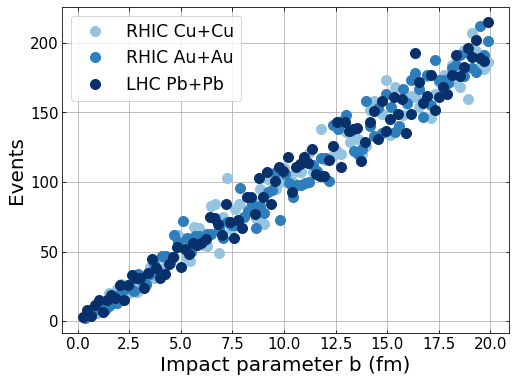

In [14]:
Nbins = 100
IP = (''.join(filter(str.isdigit, list_data[idata].split('-', 3)[1])))
print (IP == '')

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
plt.grid(True)
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.left'] = True
cmap = plt.cm.Blues
plt.rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0.4, 1, len(list_data))))
    
for idata in range(len(list_data)):
    n, bins, patches = skh_plt.hist(
#     list_Npart[idata],
    # list_Ncoll[idata],
    list_b[idata],
#     range=[0, 500],
#     range=[0, 7000],
    bins=Nbins,
#     log=True,
    errorbars=False,
    histtype='marker',
    markersize=10,
    lw=2,
    label=label_data[idata])


# plt.xlabel('N$_{part}$', fontsize=20)
# plt.xlabel('N$_{collisions}$', fontsize=20)
plt.xlabel('Impact parameter b (fm)', fontsize=20)
plt.ylabel('Events', fontsize=20)
#plt.xlim(-50,7000)
#plt.ylim(0.8,2e5)
plt.tick_params(labelsize=15, direction='in', axis='both' ,which='both')
ax.legend(fontsize = 'xx-large')
if IP != '':
    ax.set_title('Impact parameter b = {0:.1f} fm'.format(IP/10.), fontsize=20, loc='right')
    
if IP != '':
#     plt.savefig('./plot-analysis/NumParticipant-IP{0:.1f}fm.png'.format(IP/10.))
#     plt.savefig('./plot-analysis/NumParticipant-IP{0:.1f}fm.pdf'.format(IP/10.))
    # plt.savefig('./plot-analysis/NumCollisions-IP{0:.1f}fm.png'.format(IP/10.))
    # plt.savefig('./plot-analysis/NumCollisions-IP{0:.1f}fm.pdf'.format(IP/10.))
    plt.savefig('./plot-analysis/ImpactParameter-IP{0:.1f}fm.png'.format(IP/10.))
    plt.savefig('./plot-analysis/ImpactParameter-IP{0:.1f}fm.pdf'.format(IP/10.))
else:
#     plt.savefig('./plot-analysis/NumParticipant-IPRandomfm.png')
#     plt.savefig('./plot-analysis/NumParticipant-IPRandomfm.pdf')
    # plt.savefig('./plot-analysis/NumCollisions-IPRandomfm.png')
    # plt.savefig('./plot-analysis/NumCollisions-IPRandomfm.pdf')
    plt.savefig('./plot-analysis/ImpactParameter-IPRandomfm.png')
    plt.savefig('./plot-analysis/ImpactParameter-IPRandomfm.pdf')